In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from random import sample
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

def scale_data(frame):
    cols = frame.columns
    frame = pd.DataFrame(sc.fit_transform(frame))
    frame.columns = cols
    
    return frame

def construct_confusion(truth, prediction):
    #Construct Confusion matrix
    confusion = np.array([[0,0],[0,0]])
    for i in range(0, len(truth)):
        if (truth[i] == 0):
            if prediction[i] == 0:
                confusion[0,0] += 1
            else:
                confusion[0,1] += 1
        else:
            if prediction[i] == 0:
                confusion[1,0] += 1
            else:
                confusion[1,1] += 1
                
    return confusion/len(truth)

def print_confusion(confusion):
    print("\n   Predicted Class")
    print("      0  |   1")
    print("0 | %.2f | %.2f |"%(confusion[0,0], confusion[0,1]))
    print("1 | %.2f | %.2f |\n"%(confusion[1,0], confusion[1,1]))

def print_accuracy(trained_model, X, X_test, Y, Y_test):
    prediction = trained_model.predict(X)
    truth = Y.to_numpy()
    diff = truth - prediction

    confusion_train = construct_confusion(truth, prediction)

    print("Training Accuracy: %.2f%%"%(100 - np.sum(np.abs(diff))*100/len(truth)))
    print_confusion(confusion_train)

    prediction = trained_model.predict(X_test)
    truth = Y_test.to_numpy()
    diff = truth - prediction

    confusion_test = construct_confusion(truth, prediction)

    print("Test Accuracy: %.2f%%"%(100 - np.sum(np.abs(diff))*100/len(truth)))
    print_confusion(confusion_test)

    print("In-Sample Percent Survivor: %.2f%%"%((confusion_train[1,1]*100)/(confusion_train[1,1]+confusion_train[1,0])))
    print("In-Sample Percent Fatality: %.2f%%"%((confusion_train[0,0]*100)/(confusion_train[0,1]+confusion_train[0,0])))
    print("Out-Sample Percent Survivor: %.2f%%"%((confusion_test[1,1]*100)/(confusion_test[1,1]+confusion_test[1,0])))
    print("Out-Sample Percent Fatality: %.2f%%"%((confusion_test[0,0]*100)/(confusion_test[0,1]+confusion_test[0,0])))

def split_train_and_test(full_dataset, percent_split):
    if not(percent_split > 0 and percent_split < 1):
        print("Invalid Split: Value must be between 0 and 1")
        return None

    data_points = full_dataset.shape[0]

    #Create Training_list
    training_list = sample(range(data_points), int(percent_split*data_points))
    training_list.sort()

    #Create Test List
    full = [x for x in range(0,data_points)]
    full_set = set(full)
    test_list = list(full_set - set(training_list))
    test_list.sort()

    training_set = full_dataset.iloc[training_list]
    test_set = full_dataset.iloc[test_list]

    training_set.reset_index(inplace=True, drop=True)
    test_set.reset_index(inplace=True, drop=True)

    if (training_set.shape[0] + test_set.shape[0]) == data_points:
        print("Good Split")
        return {'training_set':training_set, 'test_set': test_set}
    else:
        print("Whoops! BAD SPLIT. Not sure what happened :/")
        return None

def print_set_info(full_set, X, X_test, Y, Y_test):
    print("\nTrain Set Size: %.2f%%"%(X.shape[0]*100/full_set.shape[0]))
    print("Test Set Size:  %.2f%%"%(X_test.shape[0]*100/full_set.shape[0]))

    success = np.sum(full_set['Success'].to_numpy())
    total = len(full_set['Success'].to_numpy())
    print("\nOverall Success:   %.5f%%"%(success*100/total))

    success = np.sum(Y.to_numpy())
    total = len(Y.to_numpy())
    print("Training Success:  %.5f%%"%(success*100/total))

    success = np.sum(Y_test.to_numpy())
    total = len(Y_test.to_numpy())
    print("Test Success:      %.5f%%"%(success*100/total))


data_file = "../data/full_dataset.csv"
big_frame = pd.read_csv(data_file, index_col=False)
big_frame = big_frame.astype({'Success': int})
print(big_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870664 entries, 0 to 1870663
Data columns (total 19 columns):
Artist(s)           object
Date                object
Duration            int64
Popularity          int64
Song Title          object
Success             int64
acousticness        float64
danceability        float64
energy              float64
id                  object
instrumentalness    float64
key                 int64
liveness            float64
loudness            float64
mode                int64
speechiness         float64
tempo               float64
time_signature      int64
valence             float64
dtypes: float64(9), int64(6), object(4)
memory usage: 271.2+ MB
None
Good Split

Train Set Size: 70.00%
Test Set Size:  30.00%

Overall Success:   0.31096%
Training Success:  0.31456%
Test Success:      0.30257%


In [7]:
features = [
    'Duration',
    'acousticness',
    'danceability',
    'energy', 
    'instrumentalness',
    'key',
    'liveness',
    'loudness',
    'mode',
    'speechiness',
    'tempo',
    'time_signature',
    'valence'
]
target = 'Success'
successes = big_frame[big_frame['Success']==1]
not_successes = big_frame[big_frame['Success']==0]

get_less = split_train_and_test(not_successes, 0.95)
subset = get_less['test_set']

new_frame = pd.concat([successes, subset], axis=0, ignore_index=True)
print(new_frame.info())

data_sets = split_train_and_test(new_frame, 0.7)
training_set = data_sets['training_set']
test_set = data_sets['test_set']

X = training_set[features]
X = scale_data(X)
Y = training_set[target]

X_test = test_set[features]
X_test = scale_data(X_test)
Y_test = test_set[target]

print_set_info(new_frame, X, X_test, Y, Y_test)

Good Split
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99060 entries, 0 to 99059
Data columns (total 19 columns):
Artist(s)           99060 non-null object
Date                99060 non-null object
Duration            99060 non-null int64
Popularity          99060 non-null int64
Song Title          99060 non-null object
Success             99060 non-null int64
acousticness        99060 non-null float64
danceability        99060 non-null float64
energy              99060 non-null float64
id                  99060 non-null object
instrumentalness    99060 non-null float64
key                 99060 non-null int64
liveness            99060 non-null float64
loudness            99060 non-null float64
mode                99060 non-null int64
speechiness         99060 non-null float64
tempo               99060 non-null float64
time_signature      99060 non-null int64
valence             99060 non-null float64
dtypes: float64(9), int64(6), object(4)
memory usage: 14.4+ MB
None
Good Split


In [11]:
clf = MLPClassifier(
        hidden_layer_sizes = (5000,100),
        solver='adam',
        activation='logistic',
        batch_size = int(0.01*X.shape[0]),
        learning_rate='adaptive',
        learning_rate_init=1,
        verbose=True,
        momentum=0.5,
        alpha = 2,
        max_iter = 10000,
        random_state=1
    )

clf.fit(X,Y)
print_accuracy(clf, X, X_test, Y, Y_test)

Iteration 1, loss = 253.46995808
Iteration 2, loss = 227.52529571
Iteration 3, loss = 301.90721043
Iteration 4, loss = 284.88883190
Iteration 5, loss = 257.33537852
Iteration 6, loss = 252.34830905
Iteration 7, loss = 116.53713838
Iteration 8, loss = 226.88903305
Iteration 9, loss = 198.12804405
Iteration 10, loss = 110.29880020
Iteration 11, loss = 215.88009477
Iteration 12, loss = 130.03278903
Iteration 13, loss = 181.68792887
Iteration 14, loss = 160.41896077
Iteration 15, loss = 304.96943048
Iteration 16, loss = 112.30067131
Iteration 17, loss = 66.69414145
Iteration 18, loss = 86.32095119
Iteration 19, loss = 214.42062318
Iteration 20, loss = 80.69433665
Iteration 21, loss = 142.67891802
Iteration 22, loss = 62.73154555
Iteration 23, loss = 43.93287570
Iteration 24, loss = 30.93686232
Iteration 25, loss = 28.92715995
Iteration 26, loss = 79.45731552
Iteration 27, loss = 110.25859001
Iteration 28, loss = 217.29742004
Iteration 29, loss = 121.75179260
Iteration 30, loss = 219.423833

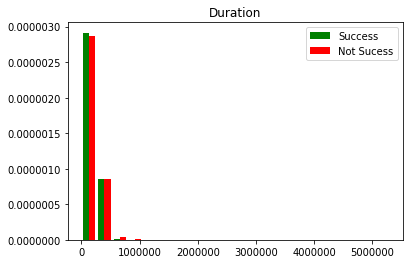

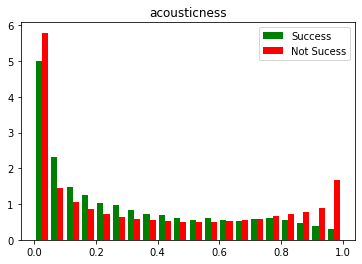

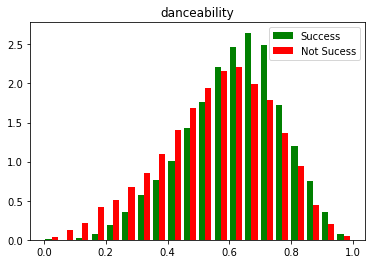

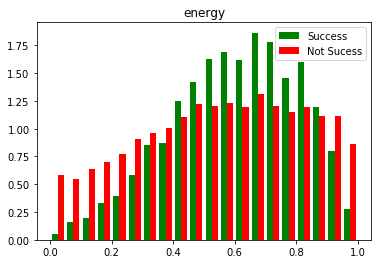

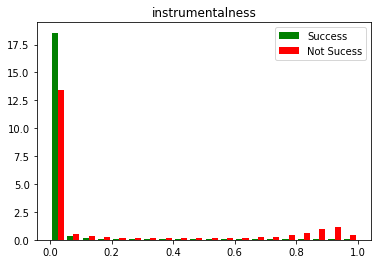

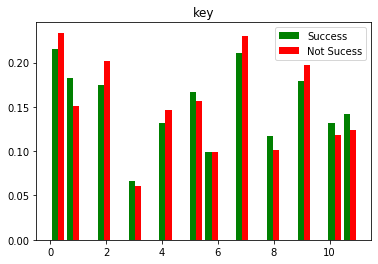

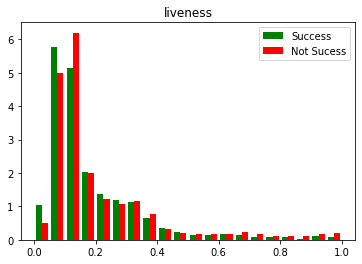

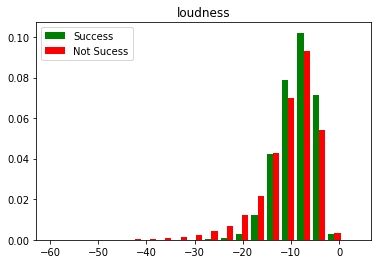

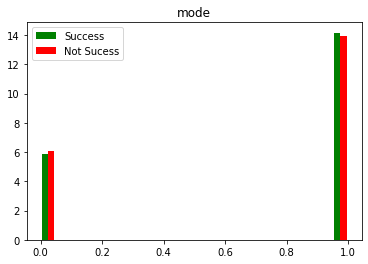

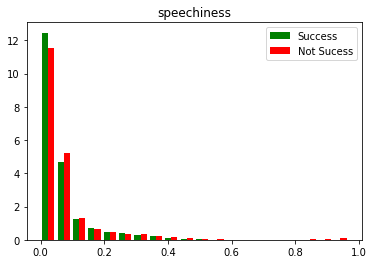

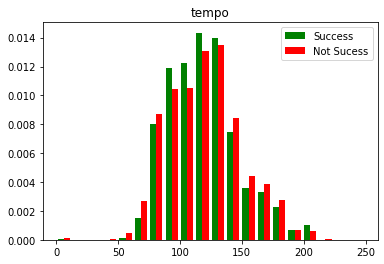

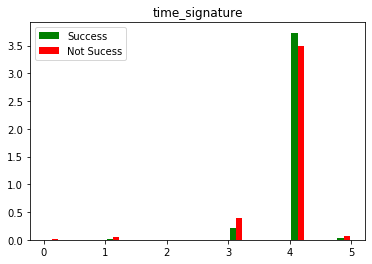

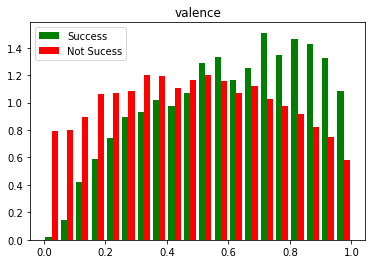

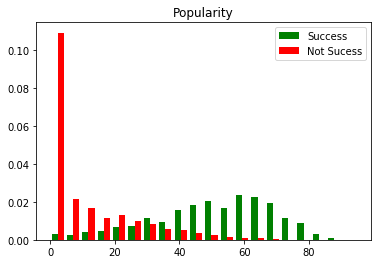

In [12]:
features = [
    'Duration',
    'acousticness',
    'danceability',
    'energy', 
    'instrumentalness',
    'key',
    'liveness',
    'loudness',
    'mode',
    'speechiness',
    'tempo',
    'time_signature',
    'valence',
    'Popularity'
]

success = new_frame[new_frame['Success'] == 1]

not_success = new_frame[new_frame['Success']==0]

colors = ['green', 'red']
for feat in features:
    plt.hist([success[feat], not_success[feat]], 20, density=True, histtype='bar', color=colors, label=['Success', 'Not Sucess'])
    #plt.hist([survived_predict, died_predict], 20, stacked=True, histtype='step', color=colors, label=['survived', 'died'])
    plt.title(feat)
    plt.legend(prop={'size': 10})
    plt.show()